# Gold & Silver Price Band Analysis

## Objective:
-To quantitatively analyse the price behaviour of Gold and Silver and construct price band charts that help understand:<br>
-Long-term trend<br>
-Volatility regimes<br>
-Overheated vs corrected zones<br>



In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
gold = pd.read_csv("data/gold.csv")
silver = pd.read_csv("data/silver_new.csv")


In [5]:
gold.columns




Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')

In [6]:
silver.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Change %'], dtype='object')

In [7]:
gold['Date'] = pd.to_datetime(gold['Date'])
silver['Date'] = pd.to_datetime(silver['Date'], format='%d-%m-%Y')

In [8]:
gold.set_index('Date', inplace=True)
silver.set_index('Date', inplace=True)

gold = gold.sort_index()
silver = silver.sort_index()



In [9]:
gold.rename(columns={'Price': 'Close'}, inplace=True)
silver.rename(columns={'Price': 'Close'}, inplace=True)



In [10]:
silver['Close'] = pd.to_numeric(
    silver['Close'].astype(str).str.replace(',', ''),
    errors='coerce'
)

gold['Close'] = pd.to_numeric(gold['Close'], errors='coerce')


In [11]:
gold.index.min(), gold.index.max()
silver.index.min(), silver.index.max()

gold['Close'].dtype
silver['Close'].dtype


dtype('float64')

### Task 1: Return & Volatility Analysis


In [12]:
start_date = max(gold.index.min(), silver.index.min())
end_date = min(gold.index.max(), silver.index.max())

start_date, end_date

(Timestamp('2014-01-01 00:00:00'), Timestamp('2026-01-02 00:00:00'))

In [13]:
gold_aligned = gold.loc[start_date:end_date].copy()
silver_aligned = silver.loc[start_date:end_date].copy()


In [14]:
gold_aligned['returns'] = gold_aligned['Close'].pct_change()
silver_aligned['returns'] = silver_aligned['Close'].pct_change()


In [15]:
print(gold_aligned.head())



            Close   Open   High    Low  Volume  Chg%   returns
Date                                                          
2014-01-01  29542  29435  29598  29340    2930  0.25       NaN
2014-01-02  29975  29678  30050  29678    3140  1.47  0.014657
2014-01-03  29727  30031  30125  29539    3050 -0.83 -0.008274
2014-01-04  29279  29279  29279  29279       0 -1.51 -0.015070
2014-01-06  29119  29300  29395  29051   24380 -0.55 -0.005465


In [16]:
print(silver_aligned.head())



               Open     High      Low    Close  Volume Change %   returns
Date                                                                     
2014-01-01  43870.0  44034.0  43735.0  43876.0   2.30K    0.10%       NaN
2014-01-02  44000.0  45500.0  44000.0  45348.0  30.70K    3.35%  0.033549
2014-01-03  45300.0  45729.0  45064.0  45475.0  24.57K    0.28%  0.002801
2014-01-04  45475.0  45475.0  45475.0  45475.0     NaN    0.00%  0.000000
2014-01-06  45421.0  45740.0  45033.0  45370.0  27.42K   -0.23% -0.002309


In [17]:
window = 252

gold_aligned['volatility'] = (
    gold_aligned['returns']
    .rolling(window)
    .std() * np.sqrt(252)
)

silver_aligned['volatility'] = (
    silver_aligned['returns']
    .rolling(window)
    .std() * np.sqrt(252)
)


In [18]:
print(gold_aligned.tail())


             Close    Open    High     Low  Volume  Chg%   returns  volatility
Date                                                                          
2025-12-29  132595  137628  138269  131695   90640 -3.77 -0.037695    0.171892
2025-12-30  133974  133185  134880  132853   36733  1.04  0.010400    0.172069
2025-12-31  135454  136526  136527  134866   59050  1.10  0.011047    0.172294
2026-01-01  135771  135687  135850  135001   14622  0.23  0.002340    0.172282
2026-01-02  135793  136143  137037  135525   51877  0.02  0.000162    0.172284


In [19]:
print(silver_aligned.tail())

                     Open           High            Low          Close  \
Date                                                                     
2025-12-26  215570.755752  228128.837362  213357.176851  221317.380194   
2025-12-29  230617.305147  230617.305147  202133.029715  202133.029715   
2025-12-30  206398.147755  223991.036279  203996.486987  223886.867860   
2025-12-31  215874.580307  215932.451651  202937.441395  202937.441395   
2026-01-02  198726.175855  204893.299911  196445.871294  196445.871294   

            Volume Change %   returns  volatility  
Date                                               
2025-12-26  76.486      NaN  0.076797    0.343295  
2025-12-29  69.856      NaN -0.086683    0.354708  
2025-12-30  77.374      NaN  0.107621    0.368862  
2025-12-31  70.134      NaN -0.093571    0.381520  
2026-01-02  70.556      NaN -0.031988    0.382346  


In [20]:
silver_aligned['Close'].dtype


dtype('float64')

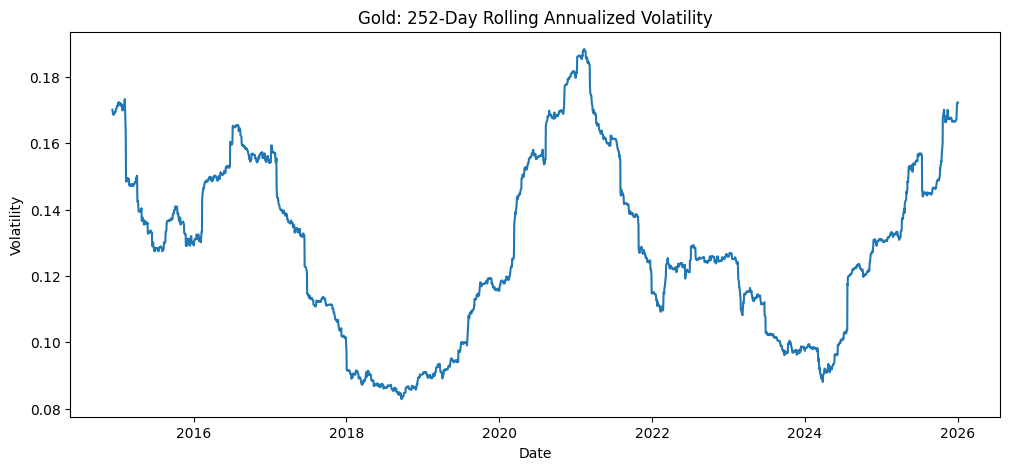

In [21]:
plt.figure(figsize=(12,5))
plt.plot(gold_aligned.index, gold_aligned['volatility'])
plt.title("Gold: 252-Day Rolling Annualized Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()



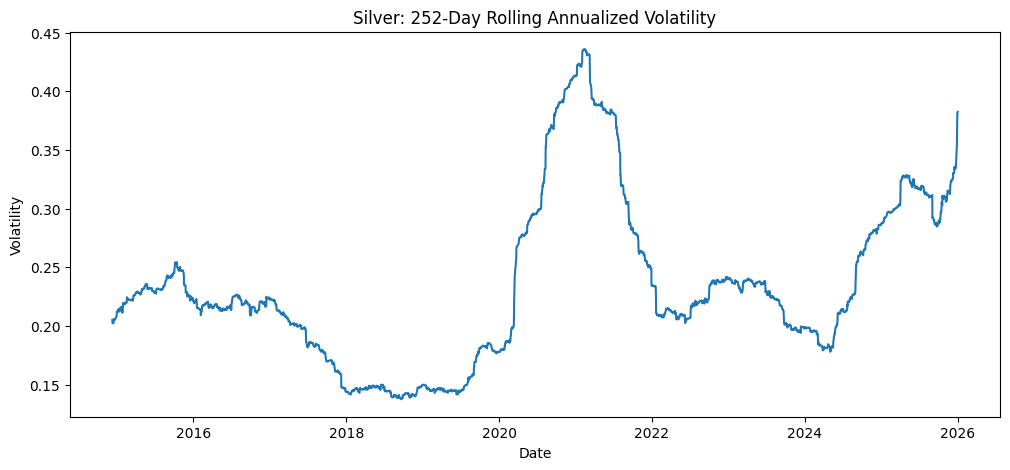

In [22]:
plt.figure(figsize=(12,5))
plt.plot(silver_aligned.index, silver_aligned['volatility'])
plt.title("Silver: 252-Day Rolling Annualized Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()


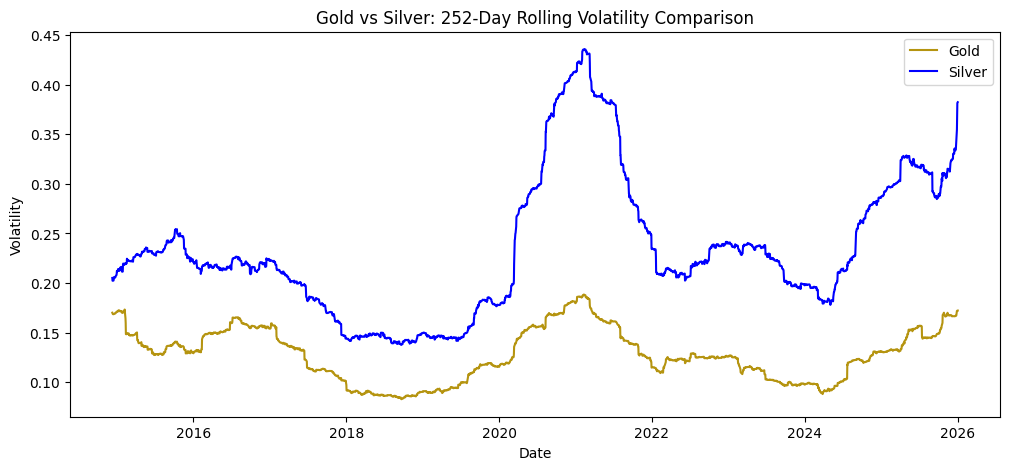

In [23]:
plt.figure(figsize=(12,5))
plt.plot( gold_aligned.index, gold_aligned['volatility'], label='Gold',color='#B59410')
plt.plot( silver_aligned.index, silver_aligned['volatility'], label='Silver',color='blue')
plt.title("Gold vs Silver: 252-Day Rolling Volatility Comparison")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


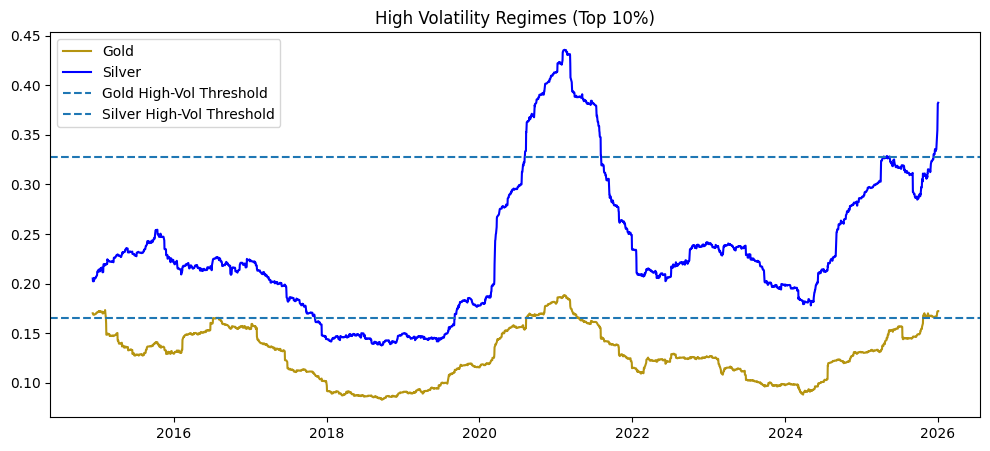

In [24]:
gold_threshold = gold_aligned['volatility'].quantile(0.90)
silver_threshold = silver_aligned['volatility'].quantile(0.90)

plt.figure(figsize=(12,5))
plt.plot( gold_aligned.index, gold_aligned['volatility'], label='Gold',color='#B59410')
plt.plot( silver_aligned.index, silver_aligned['volatility'], label='Silver',color='blue')

plt.axhline(gold_threshold, linestyle='--', label='Gold High-Vol Threshold')

plt.axhline(silver_threshold, linestyle='--', label='Silver High-Vol Threshold')

plt.title("High Volatility Regimes (Top 10%)")
plt.legend()
plt.show()


### Task 2: Price Band Construction


In [25]:
gold.head()



,Close,Open,High,Low,Volume,Chg%
Date,,,,,,
2014-01-01,29542,29435,29598,29340,2930,0.25
2014-01-02,29975,29678,30050,29678,3140,1.47
2014-01-03,29727,30031,30125,29539,3050,-0.83
2014-01-04,29279,29279,29279,29279,0,-1.51
2014-01-06,29119,29300,29395,29051,24380,-0.55


In [26]:
silver.head()

,Open,High,Low,Close,Volume,Change %
Date,,,,,,
2014-01-01,43870.0,44034.0,43735.0,43876.0,2.30K,0.10%
2014-01-02,44000.0,45500.0,44000.0,45348.0,30.70K,3.35%
2014-01-03,45300.0,45729.0,45064.0,45475.0,24.57K,0.28%
2014-01-04,45475.0,45475.0,45475.0,45475.0,NaN,0.00%
2014-01-06,45421.0,45740.0,45033.0,45370.0,27.42K,-0.23%


### Methodology
A 200-day moving average is used to represent the long-term price trend.
Rolling standard deviation over the same window captures time-varying volatility.
Upper and lower price bands are constructed at -+2 standard deviations from the trend,
representing statistically extreme price zones.


In [27]:
gold = gold.rename(columns={'Close': 'Price'})
silver = silver.rename(columns={'Close': 'Price'})


In [28]:
window = 200
z = 2

gold['MA_200'] = gold['Price'].rolling(window).mean()
gold['STD_200'] = gold['Price'].rolling(window).std()

gold['Upper_Band'] = gold['MA_200'] + 2 * gold['STD_200']
gold['Lower_Band'] = gold['MA_200'] - 2 * gold['STD_200']

gold['z_score'] = (gold['Price'] - gold['MA_200']) / gold['STD_200']



In [29]:
window = 200
z = 2

silver['MA_200'] = silver['Price'].rolling(window).mean()
silver['STD_200'] = silver['Price'].rolling(window).std()

silver['Upper_Band'] = silver['MA_200'] + 2 * silver['STD_200']
silver['Lower_Band'] = silver['MA_200'] - 2 * silver['STD_200']

silver['z_score'] = (silver['Price'] - silver['MA_200']) / silver['STD_200']




### Task 3: Price Band Chart 

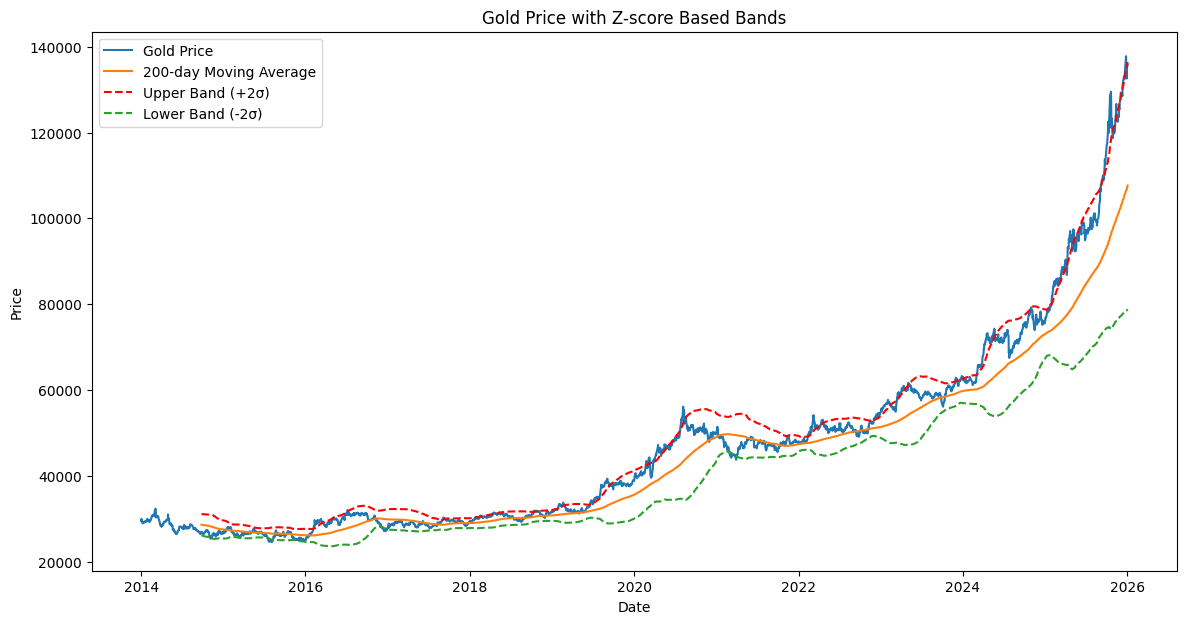

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

plt.plot(gold.index, gold['Price'], label='Gold Price')


plt.plot(gold.index, gold['MA_200'], label='200-day Moving Average')


plt.plot(gold.index, gold['Upper_Band'], linestyle='--', label='Upper Band (+2σ)', color='red')
plt.plot(gold.index, gold['Lower_Band'], linestyle='--', label='Lower Band (-2σ)')


plt.title('Gold Price with Z-score Based Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()



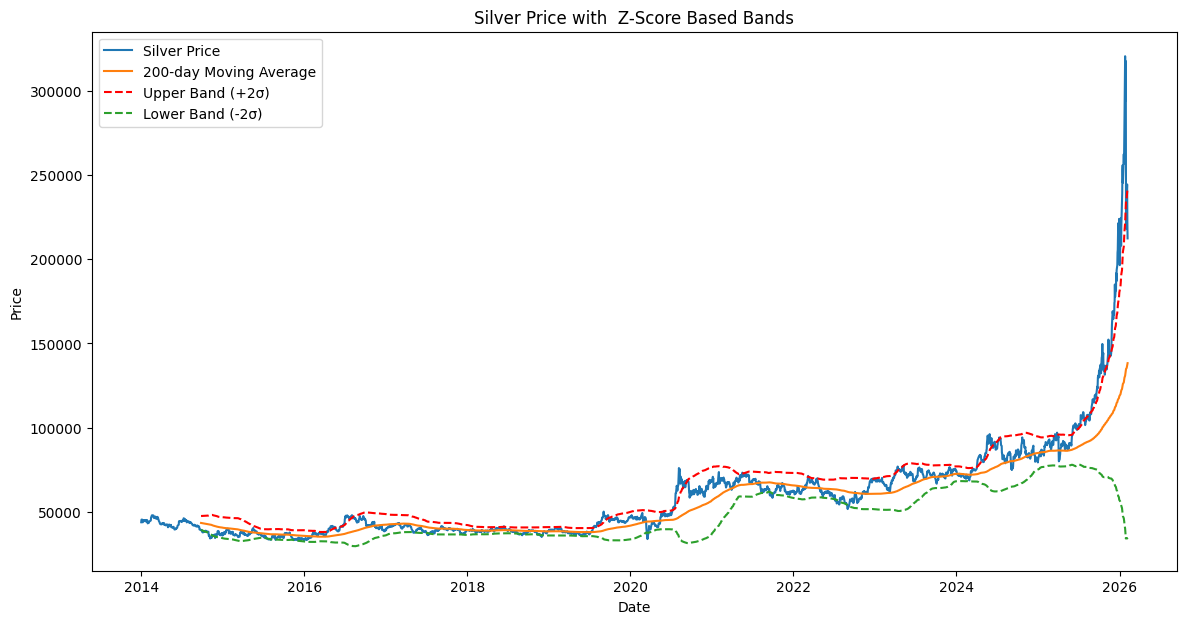

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))

plt.plot(silver.index, silver['Price'], label='Silver Price')


plt.plot(silver.index, silver['MA_200'], label='200-day Moving Average')


plt.plot(silver.index, silver['Upper_Band'], linestyle='--', label='Upper Band (+2σ)',color='red')
plt.plot(silver.index, silver['Lower_Band'], linestyle='--', label='Lower Band (-2σ)')


plt.title('Silver Price with  Z-Score Based Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()


 ### Task 4: Interpretation & Investment Insight

 Using the latest available prices, Gold is observed to be trading close to its upper volatility band, indicating elevated prices relative to its long-term trend. The widening of the bands suggests a high-volatility regime rather than a stable market environment. Silver shows a similar positioning but with noticeably wider bands, reflecting higher historical volatility and greater sensitivity to market conditions. This behaviour aligns with the article’s view of elevated volatility in noble metals. Comparatively, Silver exhibits greater deviation from trend and a higher risk profile than Gold. During such periods, a cautious and staggered approach to exposure may help manage volatility-related risk, presented as an observational insight rather than investment advice.


In [32]:
gold_latest = gold.iloc[-1]
silver_latest = silver.iloc[-1]


In [33]:
gold_latest


Price         135793.000000
Open          136143.000000
High          137037.000000
Low           135525.000000
Volume         51877.000000
Chg%               0.020000
MA_200        107632.750000
STD_200        14397.347001
Upper_Band    136427.444003
Lower_Band     78838.055997
z_score            1.955933
Name: 2026-01-02 00:00:00, dtype: float64

Gold is trading at a relatively high positive Z-score.Suggesting a moderately stretched condition rather than a mean-level regime.

In [34]:
silver_latest



Open          204270.025538
High          213923.206819
Low           185515.273336
Price         212311.923929
Volume                73.13
Change %                NaN
MA_200         138281.34301
STD_200        51797.148679
Upper_Band    241875.640368
Lower_Band     34687.045652
z_score             1.42924
Name: 2026-02-06 00:00:00, dtype: object

Silver currently exhibits a lower Z-score,present deviation from trend is small.